In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [3]:
data=pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


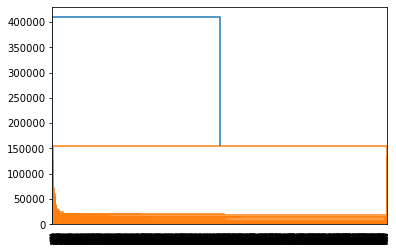

In [4]:
d1= sch.dendrogram(sch.linkage(data.iloc[:,1:], method='single'))

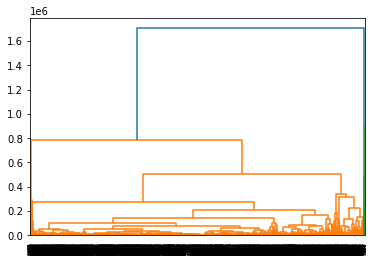

In [5]:
d2= sch.dendrogram(sch.linkage(data.iloc[:,1:], method='complete'))

In [6]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
data_norm=norm(data.iloc[:,1:])
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


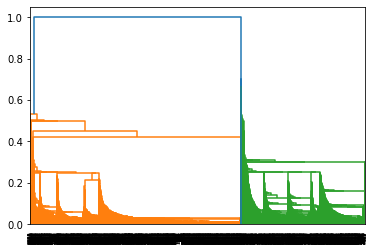

In [8]:
d3= sch.dendrogram(sch.linkage(data_norm, method='single'))

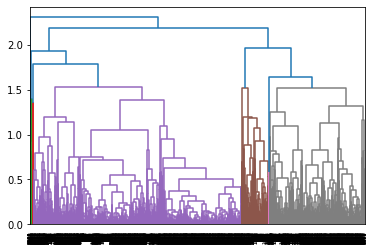

In [9]:
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

In [10]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [11]:
y_hc = hc.fit_predict(data_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,1


In [12]:
data['cluster id']=Clusters


In [13]:
from sklearn.cluster import KMeans


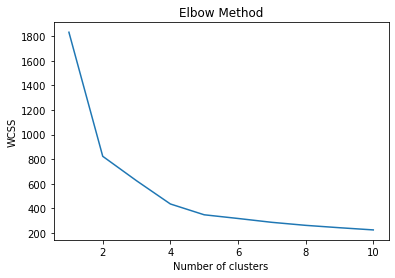

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
clusters_k = KMeans(4, random_state=42)
clusters_k.fit(data_norm)

KMeans(n_clusters=4, random_state=42)

In [16]:
clusters_k.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
#Assign clusters to the data set
data['clusterid_k'] = clusters_k.labels_

In [18]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster id,clusterid_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [19]:
from sklearn.cluster import DBSCAN

In [20]:
array=data_norm.values

In [21]:
dbscan = DBSCAN(eps=5, min_samples=12)
dbscan.fit(array)

DBSCAN(eps=5, min_samples=12)

In [22]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbcls'])
cl

,dbcls
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [26]:
data.groupby('clusterid_k').agg(['mean']).reset_index()

,clusterid_k,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0,0.000000
1,1,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,1.600248
2,2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,1.979198
3,3,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0,0.000000
